In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns

import sys
sys.path.append('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/src/')
import _config

sys.path.append('/home/unix/maxwshen/')
from mylib import util

notebook_nm = 'fig_evaluate_fitness_inference'
results_dir = _config.RESULTS_PLACE + f'{notebook_nm}/'
util.ensure_dir_exists(results_dir)

Using data folder:
 /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/data/


In [2]:
## Load data

true_df = pd.read_csv('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/out/_fitness_pt/fullgt_fitness.csv', index_col = 0)
true_df.to_csv(results_dir + f'pacbio_ground_truth_fitness.csv')

true_df.head()

,Genotype,Fitness
0,VIWS.DNGE.I.YC.KS.L,18.694780
1,VIWS..NGE.I.YC.KS.L,7.139532
2,VIW...N.E.I.YC.KS.L,6.096732
3,VIW..DNGE.I.YC.KS.L,5.322800
4,VIW...N.E.I.YC.KSKL,4.942333


## Load prediction

In [3]:
def load_inferred_fitness(modelexp = 'modelexp_illumina', model_id = '0', out_fn = '', rl = ''):
    prj_dir = '/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/out/_fitness_from_reads_pt_multi/'
    df = pd.read_csv(f'{prj_dir}/{modelexp}/model_{model_id}/_final_fitness.csv', index_col = 0)

    mdf = true_df.merge(df, on = 'Genotype')
    mdf.to_csv(results_dir + f'{modelexp}_{model_id}_fitness.csv')
    
    from scipy.stats import pearsonr, spearmanr
    dfs = mdf.dropna()
    pr, pval = pearsonr(dfs['Fitness'], dfs['Inferred fitness'])
    spr, spval = spearmanr(dfs['Fitness'], dfs['Inferred fitness'])
    print('Pearsonr', pr, pval)
    print('Spearmanr', spr, spval)
    print('N', len(dfs))
    
    #
    import matplotlib
    matplotlib.rc('font', family = 'Arial', size = 15)
    matplotlib.rcParams['mathtext.fontset'] = 'custom'
    matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
    #
    
    fig, ax = plt.subplots(figsize = (5, 5))
    
    #
    sns.scatterplot(
        x = 'Fitness',
        y = 'Inferred fitness',
        data = mdf,
        linewidth = 0,
        alpha = 0.9,
        ax = ax,
    )
    sns.despine(trim = False)
    plt.grid(alpha = 0.2)
    # plt.xscale('log')
    # plt.yscale('log')
    plt.xlabel('Fitness calculated from full-length genotypes')
    
    if rl == '':
        plt.ylabel('Inferred fitness')
    else:
        plt.ylabel(f'Fitness inferred from {rl}-nt post-alignment reads')

    ##

    plt.tight_layout()
    ax.tick_params(length = 4.5, color = 'black', width = 1.5)
    for axis in ['bottom', 'left']:
        ax.spines[axis].set_linewidth(1.5)
        ax.spines[axis].set_color('black')

    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42

    print(f'Saving to {out_fn} ...')
    plt.savefig(out_fn, transparent = True, bbox_inches = 'tight')
    
    plt.show()
    plt.close()
    
    return

Pearsonr 0.8382834317669542 1.6877279897599399e-07
Spearmanr 0.7053846153846153 8.206806844597012e-05
N 25
Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/results/fig_evaluate_fitness_inference/ill_rl100_rs0.pdf ...


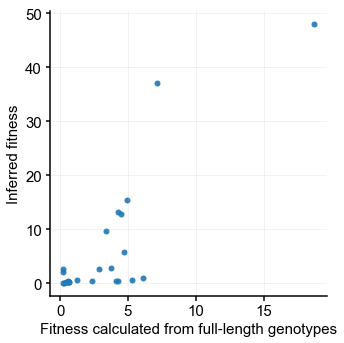

In [6]:
load_inferred_fitness(
    modelexp = 'modelexp_illumina', 
    model_id = '10', 
    out_fn = results_dir + 'ill_rl100_rs0.pdf', 
)

Pearsonr 0.8193676038539147 1.8004285500080328e-10
Spearmanr 0.724493927125506 1.8448427516464893e-07
N 39
Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/results/fig_evaluate_fitness_inference/pb_rl1_rs0.pdf ...


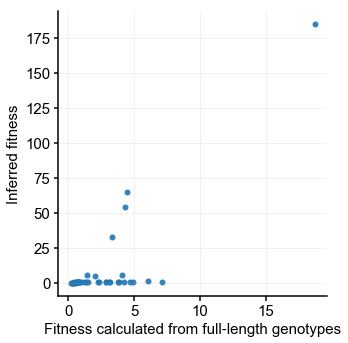

In [7]:
load_inferred_fitness(
    modelexp = 'modelexp_simple_rs', 
    model_id = '0', 
    out_fn = results_dir + 'pb_rl1_rs0.pdf', 
)

Pearsonr 0.7169311554730311 2.682714107421654e-06
Spearmanr 0.3683155080213904 0.03494381690243129
N 33
Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/results/fig_evaluate_fitness_inference/pb_rl1_noise0.05_rs0.pdf ...


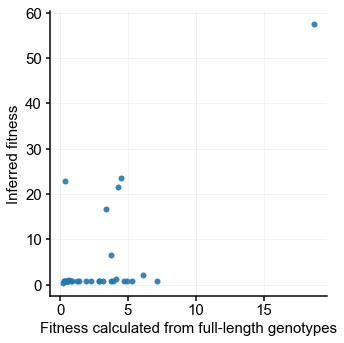

In [9]:
load_inferred_fitness(
    modelexp = 'modelexp_varynoisev2_rs', 
    model_id = '250', 
    out_fn = results_dir + 'pb_rl1_noise0.05_rs0.pdf', 
)